In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datetime import date, timedelta

days=200

today = date.today()
end_date = today.strftime("%Y-%m-%d")

start_date = today - timedelta(days=days)
start_date = start_date.strftime("%Y-%m-%d")

In [3]:
import yfinance as yf
import pandas as pd

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-05-26,68518.093750,68518.093750,69506.226562,68183.890625,69264.289062,15628433737
2024-05-27,69394.554688,69394.554688,70597.882812,68232.500000,68512.179688,25870990717
2024-05-28,68296.218750,68296.218750,69514.640625,67227.156250,69392.195312,32722265965
2024-05-29,67578.093750,67578.093750,68852.460938,67101.492188,68296.351562,26707072906
2024-05-30,68364.992188,68364.992188,69500.539062,67118.078125,67576.085938,29509712534
...,...,...,...,...,...,...
2024-12-07,99923.335938,99923.335938,100563.382812,99030.882812,99916.710938,44177510897
2024-12-08,101236.015625,101236.015625,101399.992188,98771.515625,99921.914062,44125751925


In [4]:
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
data

Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,68518.093750,68518.093750,69506.226562,68183.890625,69264.289062,15628433737,2024-05-26
1,69394.554688,69394.554688,70597.882812,68232.500000,68512.179688,25870990717,2024-05-27
2,68296.218750,68296.218750,69514.640625,67227.156250,69392.195312,32722265965,2024-05-28
3,67578.093750,67578.093750,68852.460938,67101.492188,68296.351562,26707072906,2024-05-29
4,68364.992188,68364.992188,69500.539062,67118.078125,67576.085938,29509712534,2024-05-30
...,...,...,...,...,...,...,...
195,99923.335938,99923.335938,100563.382812,99030.882812,99916.710938,44177510897,2024-12-07
196,101236.015625,101236.015625,101399.992188,98771.515625,99921.914062,44125751925,2024-12-08
197,97432.718750,97432.718750,101272.507812,94355.914062,101237.062500,110676473908,2024-12-09


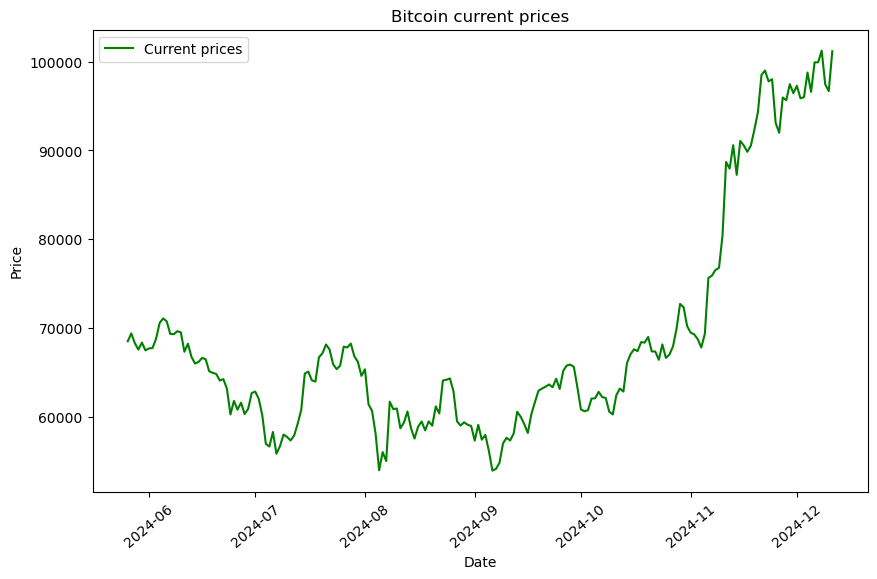

In [5]:
import matplotlib.pyplot as plt
dates = data['Date']
prices = data['Adj Close']
plt.figure(figsize=(10,6))
plt.plot(dates, prices, color='green', label= 'Current prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin current prices')
plt.xticks(rotation=40)
plt.legend()
plt.show()

In [6]:
import numpy as np

def create_dataset(serie, window_size=20):
    dataX, dataY = [], []
    for i in range(len(serie)-window_size-1):
        a = serie[i:(i+window_size), 0]
        dataX.append(a)
        dataY.append([serie[i + window_size, 0]])
    return np.array(dataX), np.array(dataY)   

In [7]:
from sklearn.preprocessing import MinMaxScaler
window_size = 20
closedf=data[['Adj Close']]
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(closedf)

X,y = create_dataset(closedf, window_size)

In [8]:
X

array([[0.30810284, 0.32663767, 0.30341078, ..., 0.30224701, 0.27084767,
        0.25508645],
       [0.32663767, 0.30341078, 0.28822434, ..., 0.27084767, 0.25508645,
        0.25889099],
       [0.30341078, 0.28822434, 0.30486515, ..., 0.25508645, 0.25889099,
        0.26836599],
       ...,
       [0.77386352, 0.81195302, 0.85415685, ..., 0.90182461, 0.9721848 ,
        0.97224031],
       [0.81195302, 0.85415685, 0.94224049, ..., 0.9721848 , 0.97224031,
        1.        ],
       [0.85415685, 0.94224049, 0.95266481, ..., 0.97224031, 1.        ,
        0.91957037]])

In [9]:
y

array([[2.58890992e-01],
       [2.68365993e-01],
       [2.65220326e-01],
       [2.36680911e-01],
       [2.32864889e-01],
       [2.30081040e-01],
       [2.14591519e-01],
       [2.17898517e-01],
       [1.95233190e-01],
       [1.33834355e-01],
       [1.66131140e-01],
       [1.45124145e-01],
       [1.61905059e-01],
       [1.34737825e-01],
       [1.46733491e-01],
       [1.84606567e-01],
       [1.88279597e-01],
       [1.70876076e-01],
       [1.31645770e-01],
       [6.40542317e-02],
       [5.73858793e-02],
       [9.20921406e-02],
       [4.01874712e-02],
       [5.82893500e-02],
       [8.58682129e-02],
       [8.02275719e-02],
       [7.18197678e-02],
       [8.35470440e-02],
       [1.11725632e-01],
       [1.44627513e-01],
       [2.30958572e-01],
       [2.35758936e-01],
       [2.15069317e-01],
       [2.12008734e-01],
       [2.69869768e-01],
       [2.79459923e-01],
       [3.00414298e-01],
       [2.88375677e-01],
       [2.53322301e-01],
       [2.41574126e-01],


In [10]:
len(y)

179

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [12]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM
model = Sequential()
model.add(Input(shape=(window_size, 1)))
model.add(LSTM(units = 32, dropout=0.1, activation="relu"))
model.add(Dense(1, activation ='relu'))
model.compile(loss= "mean_squared_error", optimizer ="adam", metrics= ['mse'])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size= 8)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1232 - mse: 0.1232 - val_loss: 0.1220 - val_mse: 0.1220
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mse:

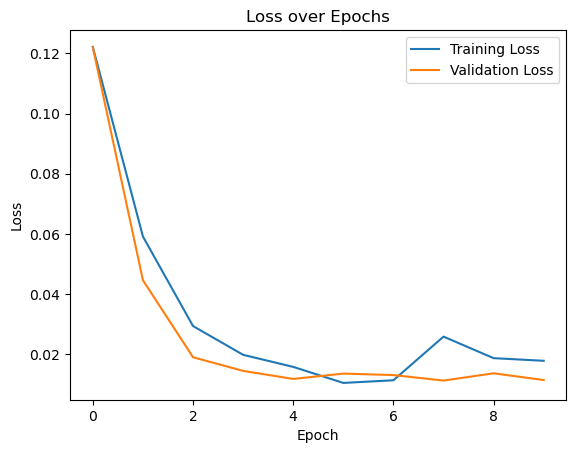

In [14]:
import matplotlib.pyplot as plt

# رسم دالة الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


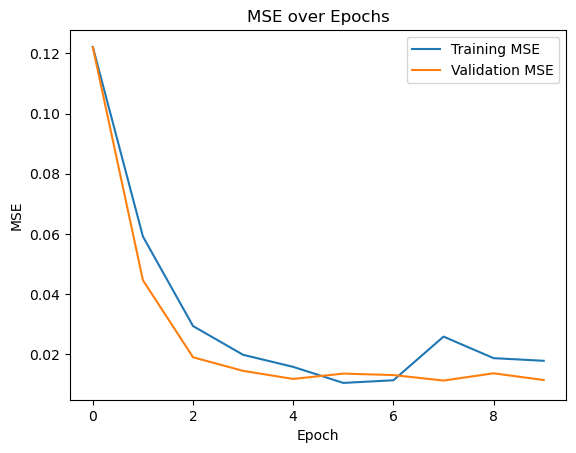

In [15]:
# رسم MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE over Epochs')
plt.legend()
plt.show()


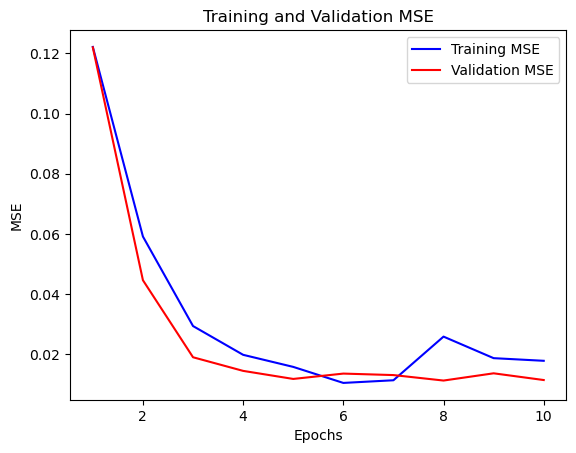

In [16]:
import matplotlib.pyplot as plt

train_mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(train_mse) + 1)

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [17]:
pred_steps = 10

predicted_prices=[]

X_pred=[X[-1]]

X_pred = np.array(X_pred)

for _ in range(pred_steps):
    
    prediction = model.predict([X_pred])
    
    price=prediction[0]
    
    predicted_prices.append(price)
    
    X_pred = np.append(X_pred, [price], axis=1)
    
    X_pred = X_pred[:, 1:]

predicted_prices = np.array(predicted_prices, dtype=object)
predicted_prices = scaler.inverse_transform(predicted_prices)
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

C:\Users\ya313\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*',)
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[95375.94310548]
 [95154.97799083]
 [94910.50906747]
 [94627.93911449]
 [94348.07214178]
 [93992.33287905]
 [93611.4719654 ]
 [93186.80529627]
 [92667.1876369 ]
 [92146.15225169]]


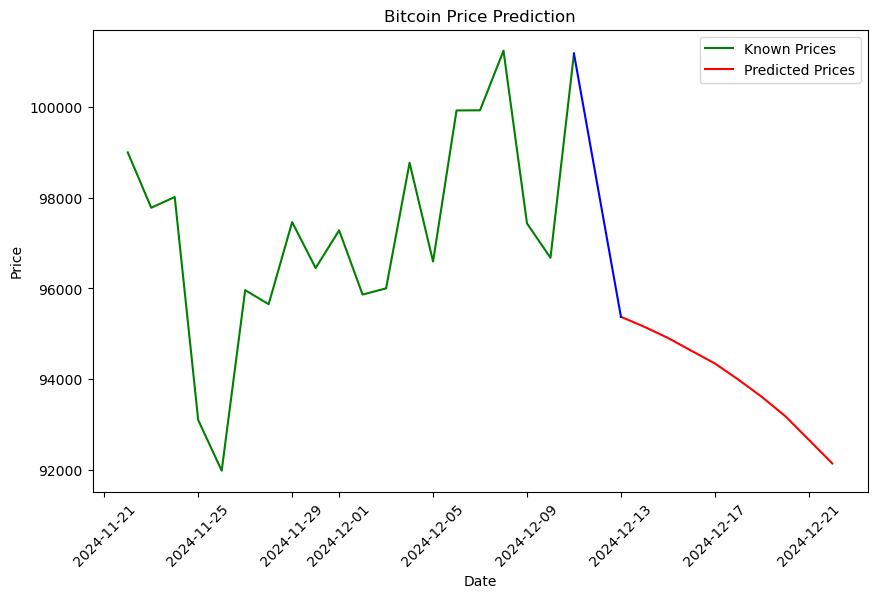

In [18]:
import matplotlib.pyplot as plt
previous_days=20

dates_known = data["Date"].iloc[-previous_days:].values

known_prices = data["Adj Close"].iloc[-previous_days:].values

dates_pred = pd.date_range(start=today + timedelta(days=1), periods=pred_steps).values

plt.figure(figsize=(10, 6))

plt.plot(dates_known, known_prices, color='green', label='Known Prices')

plt.plot(dates_pred, predicted_prices, color='red', label='Predicted Prices')

plt.plot([dates_known[-1], dates_pred[0]], [known_prices[-1], predicted_prices[0]], color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')

plt.xticks(rotation=45)

plt.legend()

plt.show()